In [178]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import imgaug.augmenters as iaa

In [179]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 349E-D4DF

 Directory of c:\Users\kevin\SmartTech CA2

13/01/2024  15:43    <DIR>          .
13/01/2024  15:43    <DIR>          ..
13/01/2024  15:27                33 .gitignore
13/01/2024  18:17         3,108,688 alpha_model.h5
13/01/2024  16:01             1,535 Flask.py
13/01/2024  16:00           788,682 SmartTech_Ca2.ipynb
12/01/2024  16:44    <DIR>          Test Drive
               4 File(s)      3,898,938 bytes
               3 Dir(s)  138,334,965,760 bytes free


In [180]:
datadir = "Test Drive"
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
print(data.head)

<bound method NDFrame.head of                                                  center  \
0     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
1     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
2     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
3     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
4     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
...                                                 ...   
7511  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7512  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7513  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7514  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7515  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   

                                                   left  \
0     C:\Users\kevin\Desktop\Test Drive\IMG\left_202...   
1     C:\Users\kevin\Desktop\Test Drive\IMG\left_202...   
2     C:\Users\kevin\Desktop\Test Drive\IMG\left_202...   
3     C:\Users\kevin\Desk

In [181]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [182]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [183]:
print(data.head)


<bound method NDFrame.head of                                   center                              left  \
0     center_2024_01_12_16_35_44_403.jpg  left_2024_01_12_16_35_44_403.jpg   
1     center_2024_01_12_16_35_44_470.jpg  left_2024_01_12_16_35_44_470.jpg   
2     center_2024_01_12_16_35_44_538.jpg  left_2024_01_12_16_35_44_538.jpg   
3     center_2024_01_12_16_35_44_608.jpg  left_2024_01_12_16_35_44_608.jpg   
4     center_2024_01_12_16_35_44_678.jpg  left_2024_01_12_16_35_44_678.jpg   
...                                  ...                               ...   
7511  center_2024_01_12_16_44_25_759.jpg  left_2024_01_12_16_44_25_759.jpg   
7512  center_2024_01_12_16_44_25_828.jpg  left_2024_01_12_16_44_25_828.jpg   
7513  center_2024_01_12_16_44_25_898.jpg  left_2024_01_12_16_44_25_898.jpg   
7514  center_2024_01_12_16_44_25_970.jpg  left_2024_01_12_16_44_25_970.jpg   
7515  center_2024_01_12_16_44_26_048.jpg  left_2024_01_12_16_44_26_048.jpg   

                                 

In [184]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


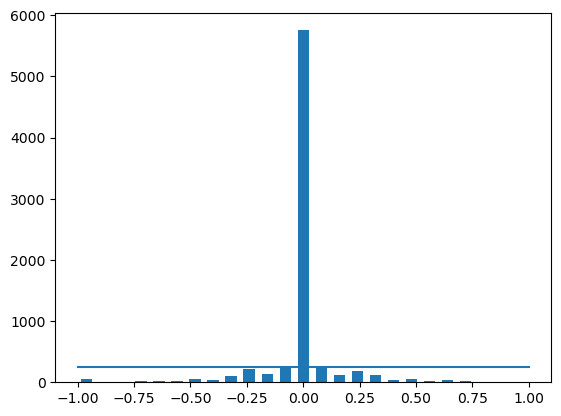

In [185]:
centre = (bins[:-1] + bins[1:])*0.5
samples_per_bin = 250
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [186]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if bins[j] <= data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

In [187]:
print("Removed: ", len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print("Remaining: ", len(data))

Removed:  5526
Remaining:  1990


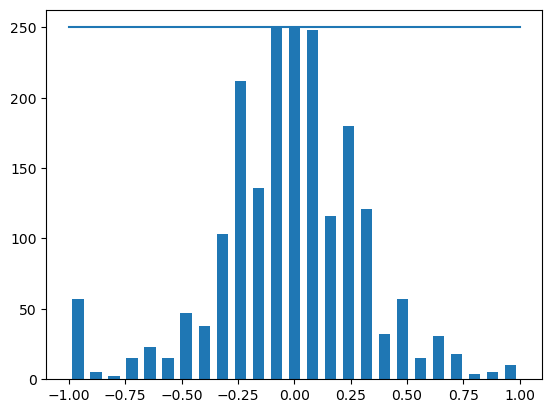

In [188]:
hist, bins = np.histogram(data['steering'], num_bins)
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [189]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [190]:
image_paths, steerings = load_img_steering(datadir+'/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

In [191]:
print(f"Traing samples {len(X_train)}, validation samples {len(X_valid)}")

Traing samples 1592, validation samples 398


Training data:  1592
Validation data:  398


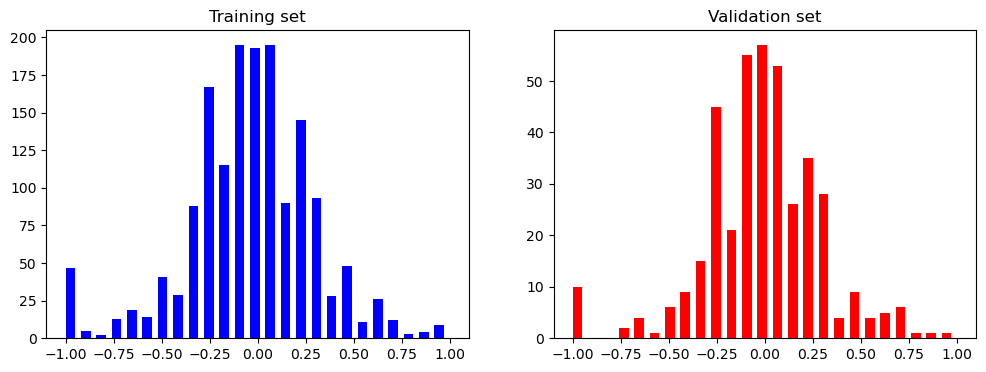

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins = num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

#print amount of training data
print("Training data: ", len(X_train))
print("Validation data: ", len(X_valid))


In [193]:
def img_preprocess(img):
    if isinstance(img, str):  # Check if img is a file path
        img = mpimg.imread(img)

    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img / 255.0  # Normalize
    return img


Text(0.5, 1.0, 'Preprocessed Image')

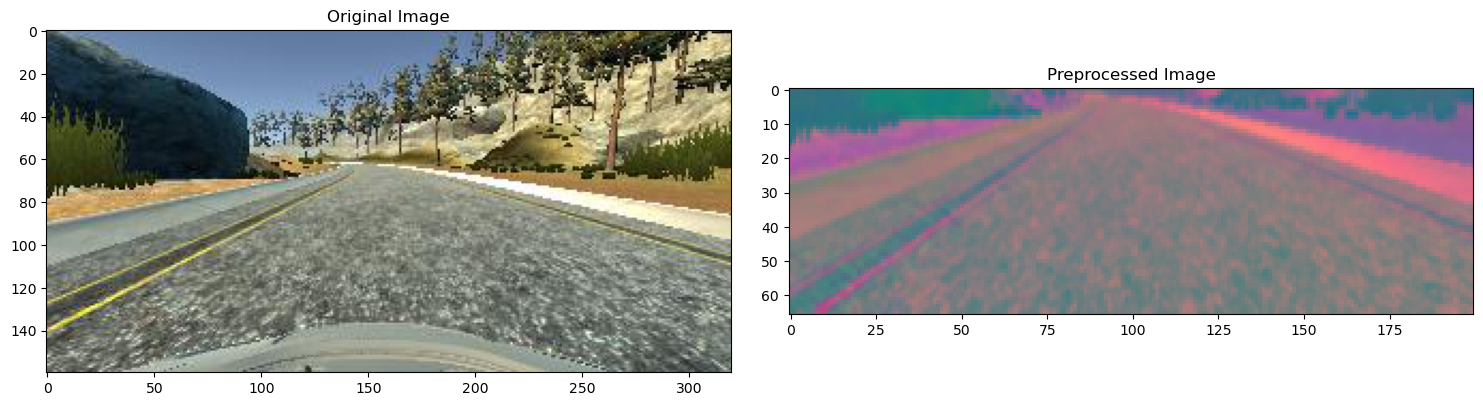

In [194]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axes = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")

In [195]:
def augment_img(img, steering_angle):
  img = mpimg.imread(img)
  if np.random.rand() < 0.5:
    pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
    img = pan.augment_image(img)
  if np.random.rand() < 0.5:
    zoom = iaa.Affine(scale=(1, 1.2))
    img = zoom.augment_image(img)
  if np.random.rand() < 0.5:
    brightness = iaa.Multiply((0.5, 1.2))
    img = brightness.augment_image(img)
  if np.random.rand() < 0.5:
    img = cv2.flip(img, 1)
    steering_angle = -steering_angle
    
  return img, steering_angle

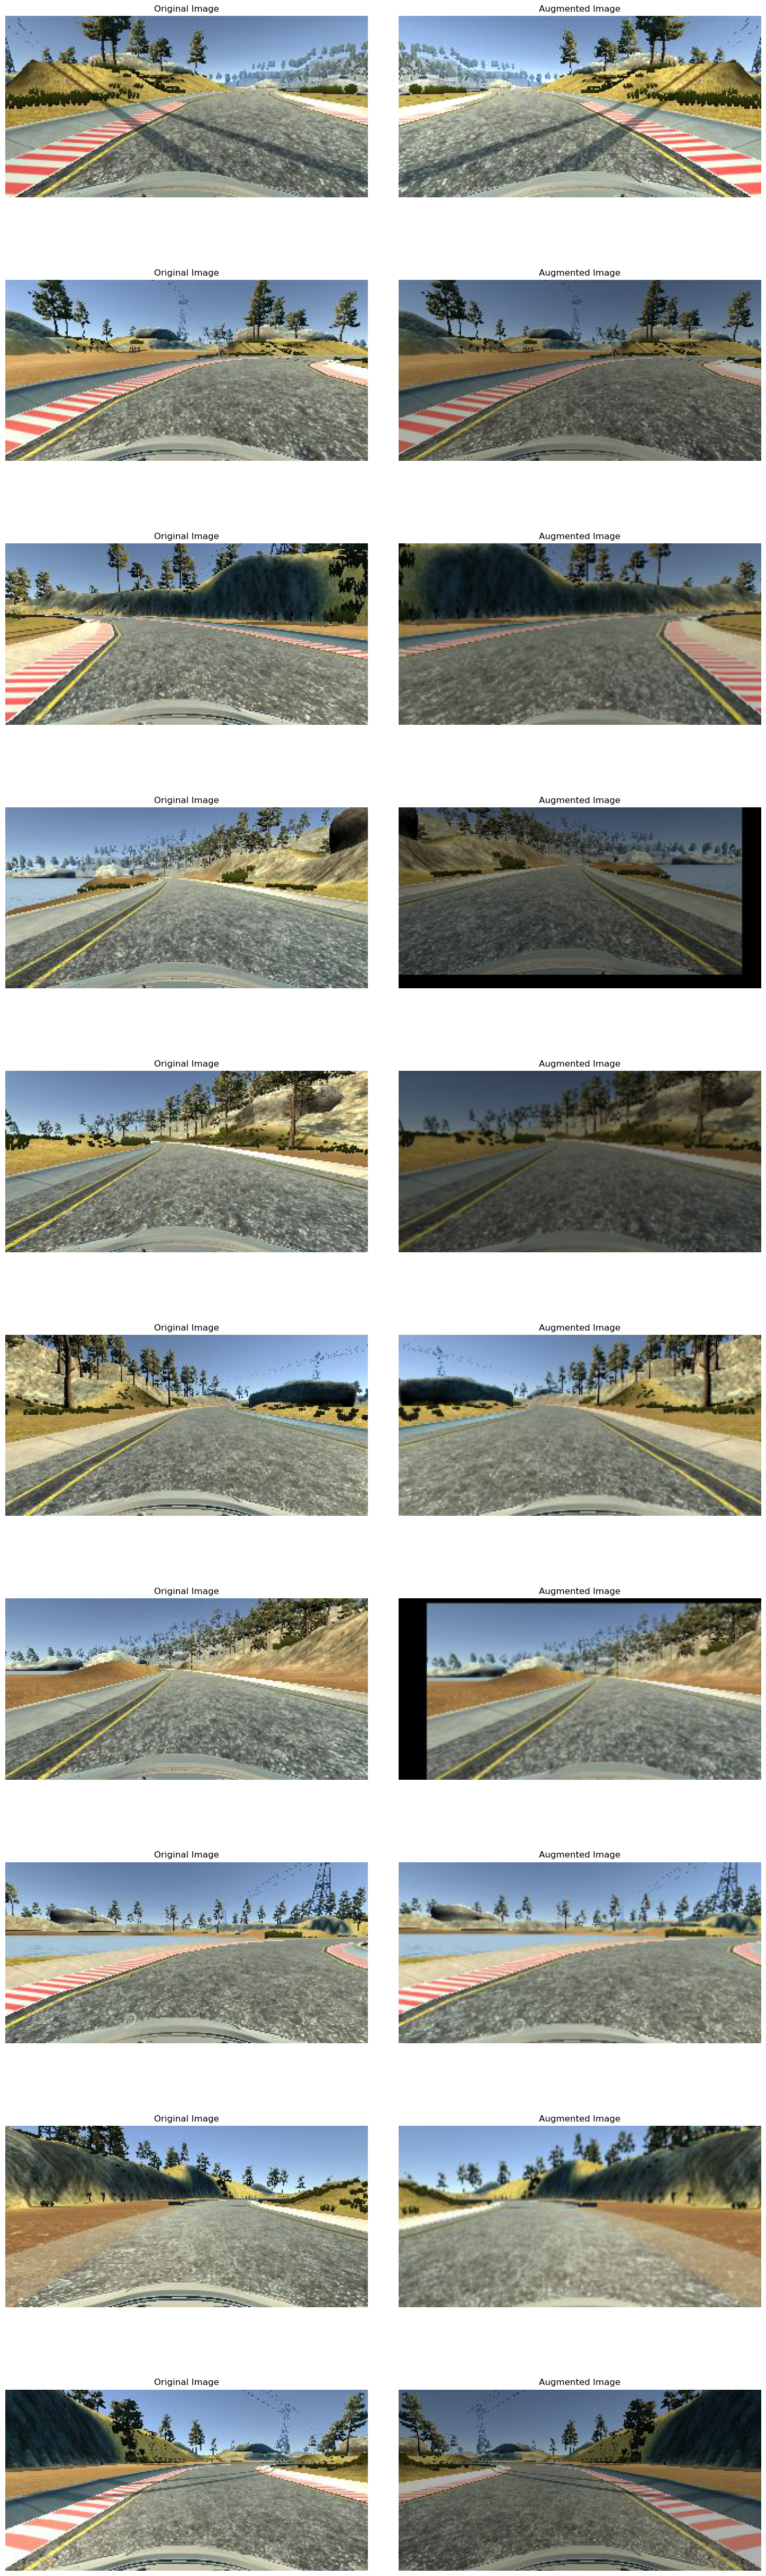

In [203]:
# show 3 augmented images
ncol = 2
nrow = 10
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    
    original_image = mpimg.imread(random_image)
    augmented_image, steering = augment_img(random_image, random_steering)
    
    axes[i][0].imshow(original_image)
    axes[i][0].set_title("Original Image")
    axes[i][1].imshow(augmented_image)
    axes[i][1].set_title("Augmented Image")
    
    axes[i][0].set_axis_off()
    axes[i][1].set_axis_off()


In [196]:
X_train_augmented = []
for i in range(len(X_train)):
    img, angle = augment_img(X_train[i], y_train[i])
    preprocessed_img = img_preprocess(img)
    X_train_augmented.append(preprocessed_img)

X_train_augmented = np.array(X_train_augmented)
X_valid = np.array(list(map(img_preprocess, X_valid)))


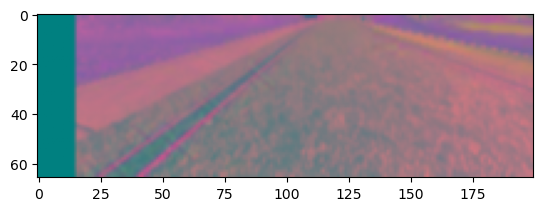

In [197]:
plt.imshow(X_train_augmented[random.randint(0, len(X_train_augmented) - 1)])
plt.show()

In [198]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer = Adam(learning_rate = 0.001)
  model.compile(loss='mse', optimizer = optimizer)
  return model


In [199]:
model = nvidia_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_16 (Dropout)        (None, 1, 18, 64)         0         
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

In [200]:
history = model.fit(X_train_augmented, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
16/16 [==============================] - 2s 58ms/step - loss: 0.4337 - val_loss: 0.1016
Epoch 2/30
16/16 [==============================] - 1s 46ms/step - loss: 0.1663 - val_loss: 0.0876
Epoch 3/30
16/16 [==============================] - 1s 46ms/step - loss: 0.1373 - val_loss: 0.0883
Epoch 4/30
16/16 [==============================] - 1s 44ms/step - loss: 0.1323 - val_loss: 0.0878
Epoch 5/30
16/16 [==============================] - 1s 44ms/step - loss: 0.1217 - val_loss: 0.0867
Epoch 6/30
16/16 [==============================] - 1s 45ms/step - loss: 0.1222 - val_loss: 0.0852
Epoch 7/30
16/16 [==============================] - 1s 45ms/step - loss: 0.1167 - val_loss: 0.0851
Epoch 8/30
16/16 [==============================] - 1s 43ms/step - loss: 0.1133 - val_loss: 0.0825
Epoch 9/30
16/16 [==============================] - 1s 44ms/step - loss: 0.1114 - val_loss: 0.0807
Epoch 10/30
16/16 [==============================] - 1s 45ms/step - loss: 0.1091 - val_loss: 0.0789
Epoch 11/

Text(0.5, 0, 'Epoch')

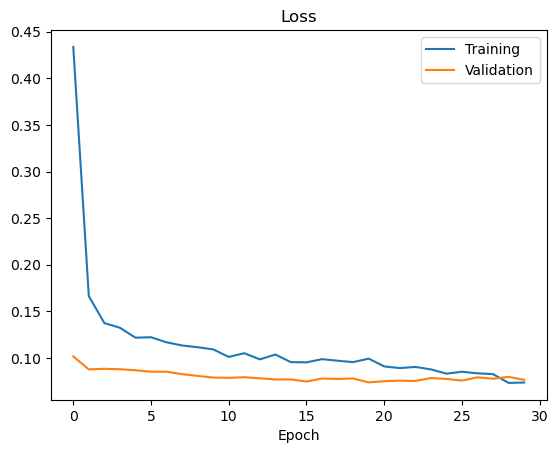

In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [202]:
model.save('alpha_model.h5')

c:\Users\kevin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
